In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlwt
from datetime import datetime
import matplotlib.dates as mdate 
import matplotlib.ticker as ticker
import matplotlib.mlab as mlab
from pylab import mpl
import os
import seaborn as sns
from statsmodels.formula.api import ols
import sklearn
import math
import scipy as sp

In [3]:
def plot_curve1(starttime,endtime,data):
    f0 = pd.DataFrame(pd.read_csv(data,sep = ',',encoding='utf-8'))
    pd.set_option('precision', 7)
    f0['ts']=pd.to_datetime(f0['Data'],format=u'%Y\u5e74%m\u6708%d\u65e5')
    f1 = f0.drop(['Data'],axis = 1)
    f2=f1.set_index(f0['ts'])
    f2.index.rename('time_span',inplace = True)
    f3=f2.drop(f2.columns[-1],axis = 1)
    f4=f3[(f3.index>=starttime) & (f3.index<=endtime)]
    f4 = f4.sort_index()
    
    dataflow = f4['DataflowByDay_4G_GB']
    data_mean=dataflow.mean()
    data_std=dataflow.std()
    f6=f4[f4['DataflowByDay_4G_GB']>=(data_mean-1.96*data_std)]
#     f6=f5[f5['DataflowByDay_4G_GB']<=(data_mean+1.96*data_std)]
       
    fig = plt.figure(figsize=(13,6),dpi = 100)
    ax1=fig.add_subplot(111)
    ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
    ax1.set_xlim(f6.index[0],f6.index[-1])
    ax1.set_xticks(pd.date_range(f6.index[0],f6.index[-1],freq='3D'))
    ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d')) 
    ax1.set_ylim(f6.min().values[0],f6.max().values[0]*1.1)
    
    mpl.rcParams['font.sans-serif'] = ['SimHei'] 
    mpl.rcParams['axes.unicode_minus'] = False     

    plt.xticks(rotation=45)
    plt.legend()
    plt.title(u'数据流量趋势图')
    plt.xlabel(u'时间')
    plt.ylabel(u'4G流量')
    plt.plot(f6,'o-',linewidth=2.5)
    plt.show()
    print f6

In [2]:
f10 = pd.read_csv(u'地市_编号.csv',sep = ',',encoding='utf-8')
f10

,常州,000
0,淮安,1
1,江苏,2
2,连云港,3
3,南京,4
4,南通,5
5,苏州,6
6,泰州,7
7,无锡,8
8,宿迁,9
9,徐州,10


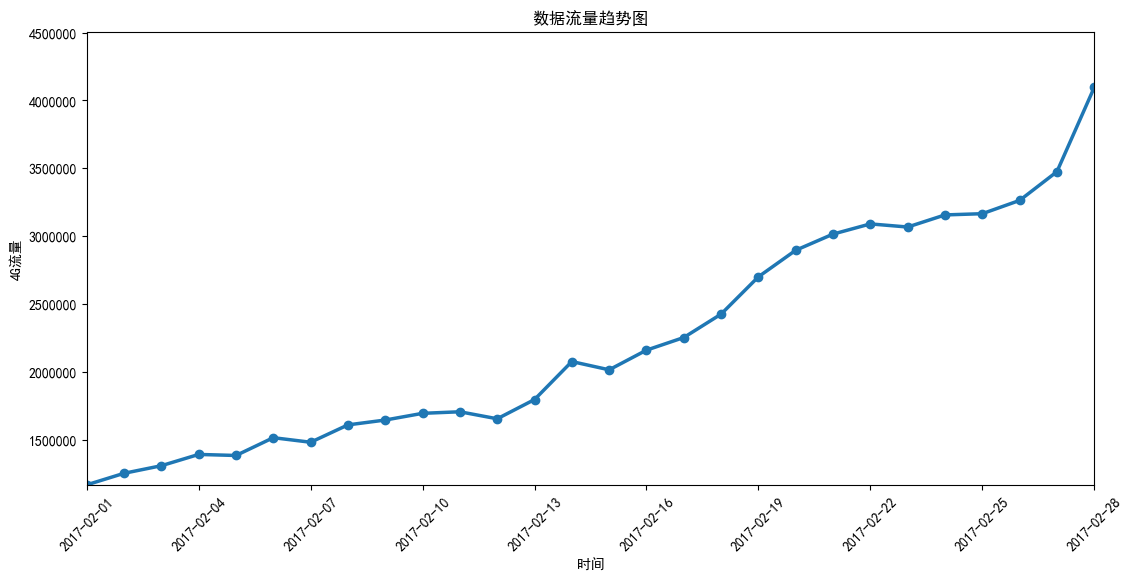

            DataflowByDay_4G_GB
time_span                      
2017-02-01          1167535.178
2017-02-02          1252580.151
2017-02-03          1308479.615
2017-02-04          1391537.729
2017-02-05          1383846.635
2017-02-06          1514941.112
2017-02-07          1481341.549
2017-02-08          1609273.271
2017-02-09          1644998.901
2017-02-10          1694421.054
2017-02-11          1705895.597
2017-02-12          1654233.317
2017-02-13          1795991.317
2017-02-14          2075914.166
2017-02-15          2015099.957
2017-02-16          2160016.450
2017-02-17          2253014.956
2017-02-18          2425529.073
2017-02-19          2700448.778
2017-02-20          2896022.534
2017-02-21          3015122.249
2017-02-22          3090243.929
2017-02-23          3067271.141
2017-02-24          3156435.022
2017-02-25          3165488.839
2017-02-26          3263295.768
2017-02-27          3475084.165
2017-02-28          4095979.001


In [13]:
plot_curve1('2017-02-01','2017-02-28','dataflow_004.csv')

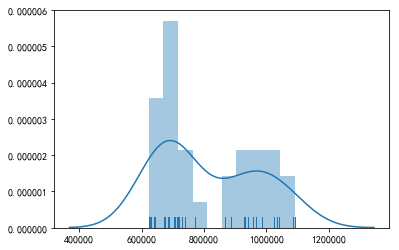

In [793]:
sns.distplot(list(f2_3['DataflowByDay_4G_GB']),bins = 10,rug=True,kde=True)
plt.show()

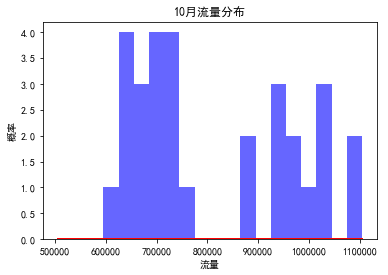

In [6]:
f0 = pd.DataFrame(pd.read_csv('dataflow_000.csv',sep = ',',encoding='utf-8'))
pd.set_option('precision', 7)
f0['ts']=pd.to_datetime(f0['Data'],format=u'%Y\u5e74%m\u6708%d\u65e5')
f1 = f0.drop(['Data'],axis = 1)
f2=f1.set_index(f0['ts'])
f2.index.rename('time_span',inplace = True)
f2.drop(f2.columns[-1],axis = 1)
f2_2=f2[(f2.index>='2016-10-01') & (f2.index<='2016-10-31')]
f2_3 = f2_2.sort_values(['DataflowByDay_4G_GB'])
dataflow = f2_3['DataflowByDay_4G_GB']
data_mean=dataflow.mean()
data_std=dataflow.std()
data_var = dataflow.var()
x = np.arange(data_mean-1.96*data_std,data_mean+1.96*data_std,30000)
plt.hist(list(dataflow), x,normed = False, facecolor='blue', alpha=0.6)
y = mlab.normpdf(x,data_mean,data_std)   
plt.plot(x, y,lw=2, c='r')  
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.title(u'10月流量分布')
plt.xlabel(u'流量')
plt.ylabel(u'概率')
plt.show()

In [11]:
n, bins, patches=plt.hist(list(dataflow), x,normed = False, facecolor='blue', alpha=0.6)

In [15]:
f2_3 = f2_2.drop(f2_2.columns[-1],axis = 1)
f2_3['DataflowByDay_4G_GB']

time_span
2016-10-01     721348.5669
2016-10-02     686333.6524
2016-10-03     672817.9859
2016-10-04     675019.4294
2016-10-05     684294.9835
2016-10-06     706954.4369
2016-10-07     739219.6090
2016-10-08     712139.4663
2016-10-09     728706.4684
2016-10-10     866699.6175
2016-10-11     884874.7109
2016-10-12     929969.5154
2016-10-13     941462.6778
2016-10-14     929524.3478
2016-10-15     640872.3029
2016-10-16     628209.3069
2016-10-17     622915.6404
2016-10-18     642870.1253
2016-10-19     629765.3213
2016-10-20     987345.9451
2016-10-21    1032435.6760
2016-10-23     967227.1198
2016-10-24     956776.1397
2016-10-25    1023921.0590
2016-10-26    1086170.8140
2016-10-27    1090569.3980
2016-10-28    1038910.5070
2016-10-29     704397.4835
2016-10-30     715589.1234
2016-10-31     771809.7893
Name: DataflowByDay_4G_GB, dtype: float64

In [88]:
[f2_2[f2_2.index>'2016-' + str(i) + '-01'].index for i in range(1,13)]

DatetimeIndex(['2016-10-04', '2016-10-05', '2016-10-06', '2016-10-07',
               '2016-10-08', '2016-10-09', '2016-10-10', '2016-10-11',
               '2016-10-12', '2016-10-13', '2016-10-14', '2016-10-15',
               '2016-10-16', '2016-10-17', '2016-10-18', '2016-10-19',
               '2016-10-20', '2016-10-21', '2016-10-23', '2016-10-24',
               '2016-10-25', '2016-10-26', '2016-10-27', '2016-10-28',
               '2016-10-29', '2016-10-30', '2016-10-31'],
              dtype='datetime64[ns]', name=u'time_span', freq=None)

In [32]:
f0 = pd.DataFrame(pd.read_csv('dataflow_011.csv',sep = ',',encoding='utf-8'))
pd.set_option('precision', 7)
f0['ts']=pd.to_datetime(f0['Data'],format=u'%Y\u5e74%m\u6708%d\u65e5')
f1 = f0.drop(['Data'],axis = 1)
f2=f1.set_index(f0['ts'])
f2.index.rename('time_span',inplace = True)
f3=f2.drop(f2.columns[-1],axis = 1)
f3=pd.DataFrame(f3)
f4=f3[f3.index<='2017-08-31']
f5=f4.sort_index()

dataflow = f5['DataflowByDay_4G_GB']
data_mean=dataflow.mean()
data_std=dataflow.std()
f6=f5[f5['DataflowByDay_4G_GB']>=(data_mean-1.96*data_std)]
# f6=f5[f5['DataflowByDay_4G_GB']<=(data_mean+1.96*data_std)]
f7= f6.groupby(lambda x:x.month)

list_gr=[]
list_month=[]
for x in f7:
    x=list(x)
    month=str(x[1].index[2]).strip().split('-')[0]+'-'+str(x[1].index[2]).strip().split('-')[1]
#    month = x[1].index[2]
    gr=(x[1][-5:].mean() - x[1][:-5].mean())/x[1][:-5].mean()   
    list_gr.append(float(gr))
    list_month.append(month)

df = pd.DataFrame({'month':list_month,'GrowingRate':list_gr})
df1=df.set_index(df['month'])
df1.index=pd.to_datetime(df1.index,format = '%Y-%m-%d')
del df1['month']
# df1=df1.to_period('M')
df2=df1.resample('M',how='mean')

fig = plt.figure(figsize=(8,4),dpi = 100)
ax1=fig.add_subplot(111)
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
ax1.set_xlim(df2.index[0],df2.index[-1])
ax1.set_ylim(df2['GrowingRate'].min()*1.1,df2['GrowingRate'].max()*1.1)  
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
mpl.rcParams['axes.unicode_minus'] = False     
plt.xticks(rotation=45)
plt.title(u'数据流量趋势图')
plt.xlabel(u'时间')
plt.ylabel(u'4G流量')
plt.xticks(list_month)
plt.plot(df2,'o-',linewidth=2.5)
plt.savefig('dataflow_gr_011.png')
plt.show()


C:\Users\cmcc\Anaconda2\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


In [33]:
df2.to_excel('11_GrowingRateByMonth.xls')

In [73]:
area_gr_mean=df2['GrowingRate'].mean()
list_mean.append({'11':area_gr_mean})
print list_mean

[{'00': 0.15023498154161877}, {'01': 0.18166950296911075}, {'02': 0.16784511264938148}, {'03': 0.27931272385422146}, {'04': 0.12819722852915325}, {'05': 0.15842360658862634}, {'06': 0.12455455852101956}, {'07': 0.20481670282024875}, {'08': 0.15339558876321294}, {'09': 0.1904995685735996}, {'10': 0.21630012760269823}, {'11': 0.2554135350851714}]


In [5]:
df2.to_excel(list_mean_11area_gr.xls)

In [4]:
list_mean = [{'00': 0.15023498154161877}, {'01': 0.18166950296911075}, {'02': 0.16784511264938148}, 
             {'03': 0.27931272385422146}, {'04': 0.12819722852915325}, {'05': 0.15842360658862634}, 
             {'06': 0.12455455852101956}, {'07': 0.20481670282024875}, {'08': 0.15339558876321294}, 
             {'09': 0.1904995685735996}, {'10': 0.21630012760269823}, {'11': 0.2554135350851714}]
list_mean_11area_gr = list_mean

In [6]:
list_mean_11area_gr[0].keys()
list_mean_11area_gr[0].values()

['00']

In [82]:
df = pd.DataFrame([], columns=['growing_rate','area'],index=[])
for x in range(0,12,1):      
    new = pd.DataFrame({'growing_rate':list_mean[x].values(),'area':x},index=[x])
    df= df.append(new)
    
# fig = plt.figure(figsize=(8,4),dpi = 100)
# ax1=fig.add_subplot(111)
# ax1.set_xlim(df.index[0],df.index[-1])
# ax1.set_xticks(np.arange(df.index[0],df.index[-1],1))
# ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%f')) 
# ax1.set_ylim(df['growing_rate'].min(),df['growing_rate'].max())
# plt.plot(df,'o-',linewidth=2.5)
# plt.savefig('average_gr_11area')
# plt.show()

# df = pd.DataFrame(index= np.arange(0,11,1),columns=(list_mean))

In [83]:
df.to_excel(list_mean_11area_gr.xls)

,area,growing_rate
0,0,0.1502350
1,1,0.1816695
2,2,0.1678451
3,3,0.2793127
4,4,0.1281972
5,5,0.1584236
6,6,0.1245546
7,7,0.2048167
8,8,0.1533956
9,9,0.1904996


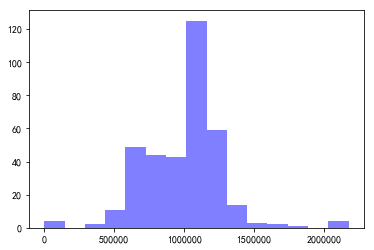

In [64]:
plt.hist(list(dataflow), 15, normed= False, facecolor='blue', alpha=0.5)
plt.show()

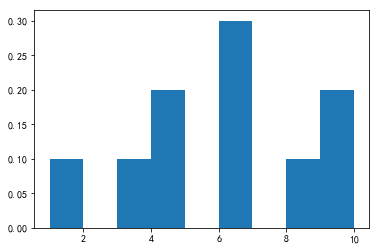

In [317]:
plt.hist([1,3,4,4,6,6,6,8,9,10],bins = 9,normed = True)
plt.show()

In [206]:
list_Angle1 = []
list_Error1 = []

In [30]:
def lr_dm(data,nm):
    f0 = pd.DataFrame(pd.read_csv(data,sep = ',',encoding='utf-8'))
    pd.set_option('precision', 7)
    f0['ts']=pd.to_datetime(f0['Data'],format=u'%Y\u5e74%m\u6708%d\u65e5')
    f1 = f0.drop(['Data'],axis = 1)
    f2=f1.set_index(f0['ts'])
    f2.index.rename('time_span',inplace = True)
    f3=f2.drop(f2.columns[-1],axis = 1)
    f3=pd.DataFrame(f3)
    
    f4=f3[f3.index<='2017-08-31']
    dataflow = f4['DataflowByDay_4G_GB']
    data_mean=dataflow.mean()
    data_std=dataflow.std()
    f6=f4[f4['DataflowByDay_4G_GB']>=(data_mean-2.58*data_std)]
    
    df = pd.DataFrame([], columns=['Angle','Error','Area','Rate','Mean','LF_Mean'],index=[])
    
    for x in f6.index:
        
        index_year = str(x).strip().split()[0]
        index_line_date = str(x).strip().split('-')[1]
        index_line_day = str(x).strip().split('-')[2].split()[0]

        if ('01'in index_line_date or '03'in index_line_date or '05'in index_line_date or '07'in index_line_date
            or '08'in index_line_date or '10'in index_line_date or '12'in index_line_date
           ) and '01'in index_line_day :
            
            list_Angle1 = []
            list_Error1 = []
            list_Rate1 = []
            list_Mean1 = []
            list_LF_mean1 = []
            
            f7=f6[(f6.index>=index_year) & (f6.index<=index_year.strip().split('-')[0]+index_line_date+'31')]
            f7=f7.sort_index()
            f7.insert(1,'days',np.arange(1,(len(f7['DataflowByDay_4G_GB'])+1))*100000)

            # 选择数据作为输入集
            f8=f7
            X = f8['days']
            y = f8['DataflowByDay_4G_GB']
            
            #一个月的均值
            Mean = f8['DataflowByDay_4G_GB'].mean()
            LF_mean1 = (f8['DataflowByDay_4G_GB'][-1]-f8['DataflowByDay_4G_GB'][0])/f8['DataflowByDay_4G_GB'][0]
            

            # 格式化数据X，y
            X=X.tolist()
            y=y.tolist()
            z=np.polyfit(X,y,1)

            #计算斜率和截距
            rate=z[0]
            B=z[1]
            Angle=math.atan(rate)

            #计算均方误差
            yArray=np.array(y)
            xArray=np.array(X)
            yTest=rate*xArray+B
            Error=sp.sqrt(sp.mean((yTest - y) ** 2))
                        
            list_Angle1.append({int(index_line_date):Angle})
            list_Error1.append({int(index_line_date):Error})
            list_Rate1.append({int(index_line_date):rate})
            list_Mean1.append({int(index_line_date):Mean})
            list_LF_mean1.append({int(index_line_date):LF_mean1})
            
            new = pd.DataFrame({'Angle':list_Angle1[0].values(),'Error':list_Error1[0].values(),'Rate':list_Rate1[0].values(),'Area':nm,'Mean':list_Mean1[0].values(),'LF_Mean':list_LF_mean1[0].values()},index = list_Angle1[0].keys())
            df= df.append(new) 
                  
        elif ('04'in index_line_date or '06'in index_line_date or '09'in index_line_date or '11'in index_line_date
           ) and '01'in index_line_day:
            list_Angle2 = []
            list_Error2 = []
            list_Rate2 = []
            list_Mean2 = []
            list_LF_mean2 = []
            
            f7=f6[(f6.index>=index_year) & (f6.index<=index_year.strip().split('-')[0]+index_line_date+'30')]
            f7=f7.sort_index()
            f7.insert(1,'days',np.arange(1,(len(f7['DataflowByDay_4G_GB'])+1))*100000)

            # 选择数据作为输入集
            f8=f7
            X = f8['days']
            y = f8['DataflowByDay_4G_GB']
            
            #一个月的均值
            Mean = f8['DataflowByDay_4G_GB'].mean()
            LF_mean2 = (f8['DataflowByDay_4G_GB'][-1]-f8['DataflowByDay_4G_GB'][0])/f8['DataflowByDay_4G_GB'][0]
            
            # 格式化数据X，y
            X=X.tolist()
            y=y.tolist()
            z=np.polyfit(X,y,1)

            #计算斜率和截距
            rate=z[0]
            B=z[1]
            Angle=math.atan(rate)

            #计算均方误差
            yArray=np.array(y)
            xArray=np.array(X)
            yTest=rate*xArray+B
            Error=sp.sqrt(sp.mean((yTest - y) ** 2))
            
            list_Angle2.append({int(index_line_date):Angle})
            list_Error2.append({int(index_line_date):Error})
            list_Rate2.append({int(index_line_date):rate})
            list_Mean2.append({int(index_line_date):Mean})
            list_LF_mean2.append({int(index_line_date):LF_mean2})
            
            new = pd.DataFrame({'Angle':list_Angle2[0].values(),'Error':list_Error2[0].values(),'Rate':list_Rate2[0].values(),'Area':nm,'Mean':list_Mean2[0].values(),'LF_Mean':list_LF_mean2[0].values()},index = list_Angle2[0].keys())
            df= df.append(new)
            
        elif '02'in index_line_date and '01'in index_line_day:
            list_Angle3 = []
            list_Error3 = []
            list_Rate3 = []
            list_Mean3 = []
            list_LF_mean3 = []
            
            f7=f6[(f6.index>=index_year) & (f6.index<=index_year.strip().split('-')[0]+index_line_date+'28')]
            f7=f7.sort_index()
            f7.insert(1,'days',np.arange(1,(len(f7['DataflowByDay_4G_GB'])+1))*100000)
          
            # 选择数据作为输入集
            f8=f7
            X = f8['days']
            y = f8['DataflowByDay_4G_GB']
            
            #一个月的均值以及月增长率
            Mean = f8['DataflowByDay_4G_GB'].mean()
            LF_mean3 = (f8['DataflowByDay_4G_GB'][-1]-f8['DataflowByDay_4G_GB'][0])/f8['DataflowByDay_4G_GB'][0]

            # 格式化数据X，y
            X=X.tolist()
            y=y.tolist()
            z=np.polyfit(X,y,1)

            #计算斜率和截距
            rate=z[0]
            B=z[1]
            Angle=math.atan(rate)

            #计算均方误差
            yArray=np.array(y)
            xArray=np.array(X)
            yTest=rate*xArray+B
            Error=sp.sqrt(sp.mean((yTest - y) ** 2))
            
            list_Angle3.append({int(index_line_date):Angle})
            list_Error3.append({int(index_line_date):Error})
            list_Rate3.append({int(index_line_date):rate})
            list_Mean3.append({int(index_line_date):Mean})
            list_LF_mean3.append({int(index_line_date):LF_mean3})
            
            new = pd.DataFrame({'Angle':list_Angle3[0].values(),'Error':list_Error3[0].values(),'Rate':list_Rate3[0].values(),'Area':nm,'Mean':list_Mean3[0].values(),'LF_Mean':list_LF_mean3[0].values()},index = list_Angle3[0].keys())
            df= df.append(new)
        else: 
            continue

    df.to_excel('%s.xls'%nm)
    return df

In [42]:
lr_dm('dataflow_011.csv','11')

,Angle,Area,Error,LF_Mean,Mean,Rate
9,0.1647012,11,69938.2100294,1.8395663,6.1569980e+05,0.1662068
10,0.0178229,11,50077.4546003,0.0246634,6.8500007e+05,0.0178248
11,0.0409563,11,43003.8024960,0.2559344,7.3718439e+05,0.0409792
12,0.1576849,11,62284.6516754,1.4025675,9.5675662e+05,0.1590050
1,0.3129113,11,378261.1063308,1.1251666,1.0499154e+06,0.3235406
2,0.0061628,11,166347.8042292,-0.1318348,1.1225403e+06,0.0061629
3,0.0183573,11,35013.3450015,0.1076300,1.0509525e+06,0.0183593
4,0.0695251,11,71601.9853300,0.5498497,1.0523325e+06,0.0696373
5,0.0237800,11,35484.0050259,-0.0178513,1.0937303e+06,0.0237844
6,0.0352788,11,50981.5803992,0.2604380,1.1716382e+06,0.0352934


In [292]:
for x in f7.index:
    print x
str(x).strip().split('-')[1]

# list_Angle1.pop(0)
# list_Error1.pop(0)
# list_Error1[11]
# list_Angle[0].keys()
# list_Error1[11].values()

2017-08-01 00:00:00
2017-08-02 00:00:00
2017-08-03 00:00:00
2017-08-04 00:00:00
2017-08-05 00:00:00
2017-08-06 00:00:00
2017-08-07 00:00:00
2017-08-08 00:00:00
2017-08-09 00:00:00
2017-08-10 00:00:00
2017-08-11 00:00:00
2017-08-12 00:00:00
2017-08-13 00:00:00
2017-08-14 00:00:00
2017-08-15 00:00:00
2017-08-16 00:00:00
2017-08-17 00:00:00
2017-08-18 00:00:00
2017-08-19 00:00:00
2017-08-20 00:00:00
2017-08-21 00:00:00
2017-08-22 00:00:00
2017-08-23 00:00:00
2017-08-24 00:00:00
2017-08-25 00:00:00
2017-08-26 00:00:00
2017-08-27 00:00:00
2017-08-28 00:00:00
2017-08-29 00:00:00
2017-08-30 00:00:00
2017-08-31 00:00:00


8

In [ ]:
# f6=f5[f5['DataflowByDay_4G_GB']<=(data_mean+2.58*data_std)]
# f7['days'] = np.arange(1,(len(f7['DataflowByDay_4G_GB'])+1))
# f7['days'] = f7.apply(lambda x:np.arange(1,(len(f7['DataflowByDay_4G_GB'])+1)))
# f7 = pd.DataFrame({'DataflowByDay_4G_GB':f7['DataflowByDay_4G_GB'],'days':np.arange(1,(len(f7['DataflowByDay_4G_GB'])+1))},index = f7.index)
# print list_Angle1
# print list_Error1
# f7.index().strip().split('-')

#ols的线性回归
# lm = ols('DataflowByDay_4G_GB~days',f7).fit()
# lm.fittedvalueslm = ols('DataflowByDay_4G_GB~days',f7).fit()
# plt.plot(f7['daays'],f7['DataflowByDay_4G_GB'],'ob')
# plt.plot(f7['days'],lm.fittedvalues)
# plt.show()
# lm.fittedvalues

#sklearn的k分法
# from sklearn.model_selection import KFold
# kf=KFold(n_splits=2)    #分成几个组
# kf.get_n_splits(X,y)
# X_train, X_test = kf.split(X)
# y_train, y_test = kf.split(y)

#sklearn的简单分组线性回归
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
# linreg = LinearRegression()
# linreg.fit(X, y)
# linreg.intercept_
# y_pred = linreg.predict(X_test)


# fig, ax = plt.subplots()
# ax.plot(X_test, y_pred)
# plt.plot(X_train, y_train,'ob')
# plt.show()
# X_train

In [243]:
df2 = pd.DataFrame([], columns=['Angle','Error','Area'],index=[])
for x in range(0,12,1):      
    new = pd.DataFrame({'Angle':list_Angle1[x].values(),'Error':list_Error1[x].values(),'Area':11},index = list_Angle1[x].keys())
    df2= df2.append(new)
df2

# fig = plt.figure(figsize=(8,4),dpi = 100)
# ax1=fig.add_subplot(111)
# ax1.set_xlim(df.index[0],df.index[-1])
# ax1.set_xticks(np.arange(df.index[0],df.index[-1],1))
# ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%f')) 
# ax1.set_ylim(df['growing_rate'].min(),df['growing_rate'].max())
# plt.plot(df,'o-',linewidth=2.5)
# plt.savefig('average_gr_11area')
# plt.show()

,Angle,Area,Error
9,1.5707362,11,69938.2100294
10,1.5702353,11,50077.4546003
11,1.5705523,11,43003.8024960
12,1.5707334,11,62284.6516754
1,1.5699740,11,185548.1893175
2,1.5691737,11,166347.8042292
3,1.5702516,11,35013.3450015
4,1.5706527,11,71601.9853300
5,1.5703759,11,35484.0050259
6,1.5705130,11,50981.5803992


[{9: 72345.316826044931}]

In [512]:
f0 = pd.DataFrame(pd.read_csv('dataflow_000.csv',sep = ',',encoding='utf-8'))
pd.set_option('precision', 7)
f0

,Data,DataflowByDay_4G_GB
0,2016年09月01日,737681.5118
1,2016年09月02日,623026.1233
2,2016年09月03日,677643.8907
3,2016年09月04日,642558.8912
4,2016年09月05日,646934.4614
5,2016年09月06日,791779.2778
6,2016年09月07日,798616.3025
7,2016年09月08日,771486.3673
8,2016年09月09日,667871.6413
9,2016年09月10日,604156.6283


In [ ]:
#  def plot_gr(data):
#     f0 = pd.DataFrame(pd.read_csv(data,sep = ',',encoding='utf-8'))
#     pd.set_option('precision', 7)
#     f0['ts']=pd.to_datetime(f0['Data'],format=u'%Y\u5e74%m\u6708%d\u65e5')
#     f1 = f0.drop(['Data'],axis = 1)
#     f2=f1.set_index(f0['ts'])
#     f2.index.rename('time_span',inplace = True)
#     f3=f2.drop(f2.columns[-1],axis = 1)
    

In [13]:
f0 = pd.DataFrame(pd.read_csv('dataflow_000.csv',sep = ',',encoding='utf-8'))
pd.set_option('precision', 7)
f0['ts']=pd.to_datetime(f0['Data'],format=u'%Y\u5e74%m\u6708%d\u65e5')
f1 = f0.drop(['Data'],axis = 1)
f2=f1.set_index(f0['ts'])
f2.index.rename('time_span',inplace = True)
f3=f2.drop(f2.columns[-1],axis = 1)
f3=pd.DataFrame(f3)
f4=f3[f3.index<='2017-08-31']
f5= f4.groupby(lambda x:x.year)


list_gr=[]
list_month=[]
for x,y in f5:
    if x == 2016:
        y = y.groupby(lambda i:i.month)
    elif x == 2017:
        
#         x=list(x)
#         month=str(x[1].index[2]).strip().split('-')[0]+'-'+str(x[1].index[2]).strip().split('-')[1]
#         gr=(x[1][-5:].mean() - x[1][:-5].mean())/x[1][:-5].mean()   
#         list_gr.append(float(gr))
#         list_month.append(month)
    

   

<class 'pandas.core.frame.DataFrame'>
2017


In [9]:
f2_1=f2.drop(f2.columns[-1],axis = 1)
f2_1=pd.DataFrame(f2_1)
print f2_1.max().values[0]
print f2_1.max().values

2301004.922
[ 2301004.922]


In [515]:
f2_3=f2_1[f2_1.index<='2017-08-31']
grouped = f2_3.groupby(lambda x:x.month)
f

DatetimeIndex(['2016-09-01', '2016-09-02', '2016-09-03', '2016-09-04',
               '2016-09-05', '2016-09-06', '2016-09-07', '2016-09-08',
               '2016-09-09', '2016-09-10',
               ...
               '2017-08-22', '2017-08-23', '2017-08-24', '2017-08-25',
               '2017-08-26', '2017-08-27', '2017-08-28', '2017-08-29',
               '2017-08-30', '2017-08-31'],
              dtype='datetime64[ns]', name=u'time_span', length=361, freq=None)

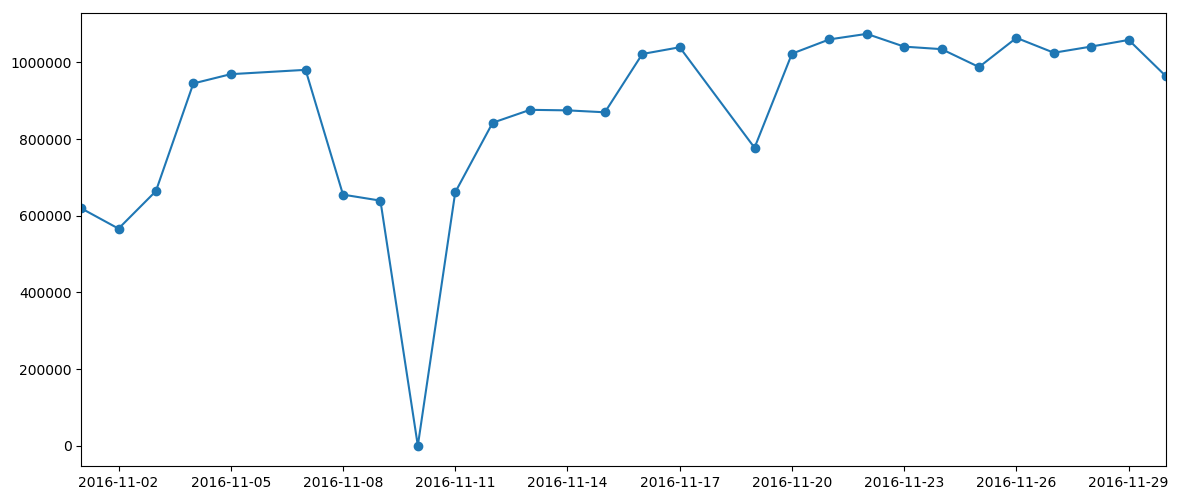

In [84]:
f2_2=f2_1[(f2_1.index>='2016-11-01') & (f2_1.index<='2016-11-30')]

fig = plt.figure(figsize=(14,6),dpi = 100)
ax1 = fig.add_subplot(1,1,1) 
autodates = mdate.AutoDateLocator()  
yearsFmt = mdate.DateFormatter('%Y-%m-%d')
ax1.xaxis.set_major_locator(autodates)       #设置时间间隔  
ax1.xaxis.set_major_formatter(yearsFmt)     #设置时间显示格式 
ax1.set_xlim(f2_2.index[0],f2_2.index[-1])
plt.plot(f2_2,'o-')
plt.show()

In [12]:
f2_2

,DataflowByDay_4G_GB
time_span,
2016-11-01,619238.1301
2016-11-02,566100.8160
2016-11-03,664026.2397
2016-11-04,944744.1461
2016-11-05,968934.7532
2016-11-07,980223.2630
2016-11-08,654779.9357
2016-11-09,639127.2390
2016-11-10,0.0000


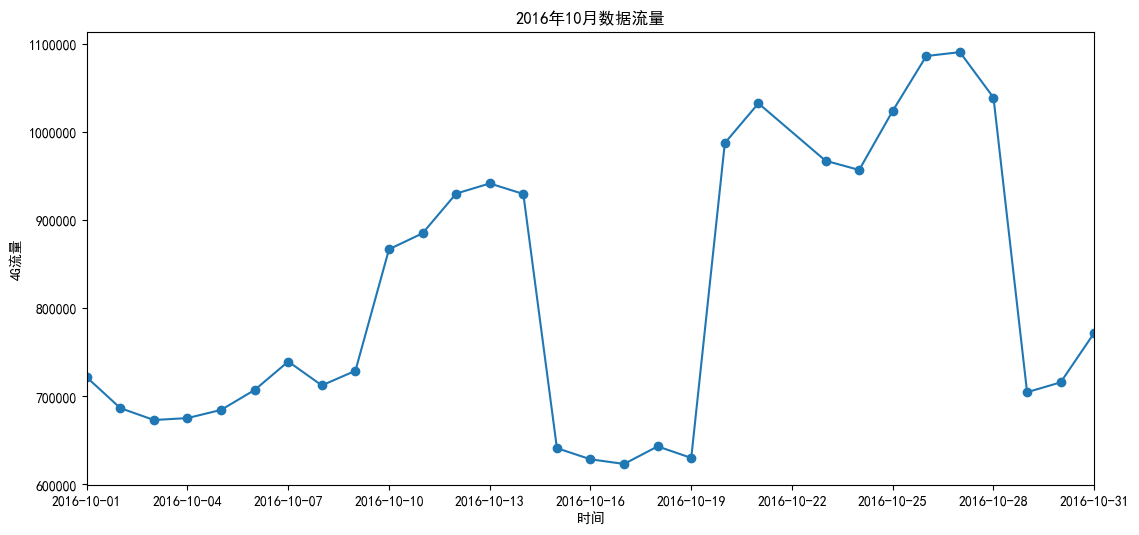

In [115]:
import matplotlib.dates as mdate 
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from pylab import * 

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

f2_3=f2_1[(f2_1.index>='2016-09-01') & (f2_1.index<='2016-10-31')]

fig = plt.figure(figsize=(13,6),dpi = 100)
ax1=fig.add_subplot(111)
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
ax1.set_xlim(f2_3.index[0],f2_3.index[-1])
ax1.set_xticks(pd.date_range(f2_3.index[0],f2_3.index[-1],freq='3D'))

plt.title(u'2016年10月数据流量')
plt.xlabel(u'时间')
plt.ylabel(u'4G流量')
plt.plot(f2_3,'o-')
plt.show()

In [569]:
f2_3.index()

TypeError: 'DatetimeIndex' object is not callable

In [53]:
'''
    autodates = AutoDateLocator()  
    yearsFmt = DateFormatter('%Y-%m-%d')  
    figure.autofmt_xdate()        #设置x轴时间外观  
    ax.xaxis.set_major_locator(autodates)       #设置时间间隔  
    ax.xaxis.set_major_formatter(yearsFmt)      #设置时间显示格式  
    ax.set_xticks() #设置x轴间隔  
    ax.set_xlim()   #设置x轴范围

    fig = plt.figure(figsize=(13,6),dpi = 100)
    ax1=fig.add_subplot(111)
    ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
    ax1.set_xlim(f4.index[0],f4.index[-1])
    ax1.set_xticks(pd.date_range(f4.index[0],f4.index[-1],freq='3D'))
    ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d')) 
    ax1.set_ylim(f4.min().values[0]*1.1,f4.max().values[0]*1.1)
    
    plt.xticks(pd.date_range(f4.index[0],f4.index[-1],freq='3D'),rotation=45)
    plt.title(u'数据流量趋势图')
    plt.xlabel(u'时间')
    plt.ylabel(u'4G流量')
    plt.plot(f4,'o-')
    plt.show()
'''

"\nautodates = AutoDateLocator()  \nyearsFmt = DateFormatter('%Y-%m-%d')  \nfigure.autofmt_xdate()        #\xe8\xae\xbe\xe7\xbd\xaex\xe8\xbd\xb4\xe6\x97\xb6\xe9\x97\xb4\xe5\xa4\x96\xe8\xa7\x82  \nax.xaxis.set_major_locator(autodates)       #\xe8\xae\xbe\xe7\xbd\xae\xe6\x97\xb6\xe9\x97\xb4\xe9\x97\xb4\xe9\x9a\x94  \nax.xaxis.set_major_formatter(yearsFmt)      #\xe8\xae\xbe\xe7\xbd\xae\xe6\x97\xb6\xe9\x97\xb4\xe6\x98\xbe\xe7\xa4\xba\xe6\xa0\xbc\xe5\xbc\x8f  \nax.set_xticks() #\xe8\xae\xbe\xe7\xbd\xaex\xe8\xbd\xb4\xe9\x97\xb4\xe9\x9a\x94  \nax.set_xlim()   #\xe8\xae\xbe\xe7\xbd\xaex\xe8\xbd\xb4\xe8\x8c\x83\xe5\x9b\xb4\n"

In [ ]:
'''
def plot_curve1(data,title):
    fig1 = plt.figure(figsize=(15,5))
    ax1 = fig1.add_subplot(1,1,1)
    ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))#设置时间标签显示格式
    plt.xticks(pd.date_range('2014-09-01','2014-09-30'),rotation=90)
    plt.title(title)
    plt.plot(data,'o-')
    plt.show()
    
data1,data2=read_data()  #读取数据
print(data1.head(10))
plot_curve1(data1,'data1')
'''

In [69]:
f3=pd.DataFrame(f2)

,DataflowByDay_4G_GB,ts
ts,,
2016-09-01,737681.5118,2016-09-01
2016-09-02,623026.1233,2016-09-02
2016-09-03,677643.8907,2016-09-03
2016-09-04,642558.8912,2016-09-04
2016-09-05,646934.4614,2016-09-05
2016-09-06,791779.2778,2016-09-06
2016-09-07,798616.3025,2016-09-07
2016-09-08,771486.3673,2016-09-08
2016-09-09,667871.6413,2016-09-09


In [ ]:
f2=f2.sort_values(['DataflowByDay_4G_GB'],ascending = False)
f2.loc[f2['DataflowByDay_4G_GB'] <=  (1323417.2-447708.02)]